# IMDB WebScraping Project

In [1]:
# importing required libraries to scrape the data from website

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# storing the website link to scrape in a variable 'url'

url = "https://www.imdb.com/chart/top/"

In [3]:
url

'https://www.imdb.com/chart/top/'

In [4]:
# As IMDB site blocks scraping spider. So, I'm using 'User-Agent' to bypass the scrape block.

page = requests.get(url,headers = {"USE USER AGENT HERE"})

In [5]:
# Website is accessible and Response is 200.

page

<Response [200]>

In [6]:
page.content;

In [14]:
# Using BeautifulSoup to make the html file more readable.

%%capture
soup = BeautifulSoup(page.content,'html.parser')
print(soup.prettify())
    


UsageError: Line magic function `%%capture` not found.


In [19]:
# below are the tags that consists of Title and Ratings

soup.find_all('h3', class_="ipc-title__text");

In [20]:
soup.find_all(class_='ipc-rating-star');

In [21]:
scraped_movie = soup.find_all('h3', class_="ipc-title__text")

In [53]:
movies = []

for movie in scraped_movie:
    movies.append(movie.get_text().strip())
   

In [60]:
## displaying 6 movies from the list to check the format and also to keep the notebook neat and clean.

movies[:6]

['IMDb Charts',
 '1. The Shawshank Redemption',
 '2. The Godfather',
 '3. The Dark Knight',
 '4. The Godfather: Part II',
 '5. 12 Angry Men']

In [59]:
# As the result of movies contain most of the unwanted things along with the required data.
# I'm using .isdigit() method to filter out names with numerical data for eg. 1. The Shawshank Redemption

clean_movies = [item for item in movies if item[0].isdigit()]

for i in clean_movies:
    print(i)

1. The Shawshank Redemption
2. The Godfather
3. The Dark Knight
4. The Godfather: Part II
5. 12 Angry Men
6. Schindler's List
7. The Lord of the Rings: The Return of the King
8. Pulp Fiction
9. The Lord of the Rings: The Fellowship of the Ring
10. Il Buono, Il Brutto, Il Cattivo
11. Forrest Gump
12. The Lord of the Rings: The Two Towers
13. Fight Club
14. Dune: Part Two
15. Inception
16. Star Wars: Episode V - The Empire Strikes Back
17. The Matrix
18. GoodFellas
19. One Flew Over the Cuckoo's Nest
20. Se7en
21. Interstellar
22. It's a Wonderful Life
23. Shichinin No Samurai
24. The Silence of the Lambs
25. Saving Private Ryan
26. City of God
27. Life Is Beautiful
28. The Green Mile
29. Terminator 2: Judgment Day
30. Star Wars: Episode IV - A New Hope
31. Back to the Future
32. Spirited Away
33. The Pianist
34. Parasite
35. Spider-man: Across the Spider-verse
36. Psycho
37. Gladiator
38. The Lion King
39. Léon
40. The Departed
41. American History X
42. Whiplash
43. The Prestige
44. Gr

In [62]:
clean_movies[:6]

['1. The Shawshank Redemption',
 '2. The Godfather',
 '3. The Dark Knight',
 '4. The Godfather: Part II',
 '5. 12 Angry Men',
 "6. Schindler's List"]

In [25]:
# Now, using .split() method to filter out names alone.

movies_clean = [i.split(' ',1)[1] for i in clean_movies]

In [64]:
movies_clean[:6]

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 "Schindler's List"]

In [27]:
soup.find_all('span', class_="ipc-rating-star");

In [28]:
ratings_raw = soup.find_all('span', class_="ipc-rating-star")

In [30]:
ratings_raw;

In [65]:
ratings= []


for rating in ratings_raw:
    ratings.append(rating.get_text().strip())
   

In [67]:
ratings[:6] ## checking the format

['9.3\xa0(2.9M)', 'Rate', '9.2\xa0(2M)', 'Rate', '9.0\xa0(2.9M)', 'Rate']

In [32]:
cl_ratings = [item for item in ratings if item[0].isdigit()]

for i in cl_ratings:
    
    print(i)

9.3 (2.9M)
9.2 (2M)
9.0 (2.9M)
9.0 (1.4M)
9.0 (859K)
9.0 (1.4M)
9.0 (2M)
8.9 (2.2M)
8.9 (2M)
8.8 (807K)
8.8 (2.2M)
8.8 (1.8M)
8.8 (2.3M)
8.9 (248K)
8.8 (2.5M)
8.7 (1.4M)
8.7 (2M)
8.7 (1.3M)
8.7 (1.1M)
8.6 (1.8M)
8.7 (2.1M)
8.6 (497K)
8.6 (365K)
8.6 (1.5M)
8.6 (1.5M)
8.6 (797K)
8.6 (740K)
8.6 (1.4M)
8.6 (1.2M)
8.6 (1.4M)
8.5 (1.3M)
8.6 (843K)
8.5 (906K)
8.5 (948K)
8.6 (358K)
8.5 (715K)
8.5 (1.6M)
8.5 (1.1M)
8.5 (1.2M)
8.5 (1.4M)
8.5 (1.2M)
8.5 (980K)
8.5 (1.4M)
8.5 (308K)
8.6 (68K)
8.5 (1.1M)
8.5 (604K)
8.5 (924K)
8.5 (281K)
8.5 (258K)
8.5 (520K)
8.5 (348K)
8.5 (945K)
8.5 (195K)
9.0 (105K)
8.4 (707K)
8.5 (1.7M)
8.4 (1.3M)
8.4 (1.2M)
8.4 (1M)
8.4 (409K)
8.4 (235K)
8.4 (211K)
8.4 (1.2M)
8.4 (665K)
8.4 (1.1M)
8.4 (137K)
8.4 (236K)
8.4 (759K)
8.4 (1.6M)
8.4 (1.8M)
8.4 (516K)
8.3 (1.2M)
8.3 (632K)
8.4 (585K)
8.4 (426K)
8.3 (1.1M)
8.4 (263K)
8.3 (1.1M)
8.4 (1.3M)
8.4 (1.5M)
8.3 (431K)
8.3 (1.1M)
8.4 (316K)
8.3 (376K)
8.4 (53K)
8.4 (432K)
8.3 (685K)
8.3 (259K)
8.4 (104K)
8.3 (895K)
8.4 (96K)
8

In [68]:
cl_ratings[:6]

['9.3\xa0(2.9M)',
 '9.2\xa0(2M)',
 '9.0\xa0(2.9M)',
 '9.0\xa0(1.4M)',
 '9.0\xa0(859K)',
 '9.0\xa0(1.4M)']

In [34]:
clean_ratings = [item.split('\xa0') for item in cl_ratings]

In [69]:
clean_ratings[:6]

[['9.3', '(2.9M)'],
 ['9.2', '(2M)'],
 ['9.0', '(2.9M)'],
 ['9.0', '(1.4M)'],
 ['9.0', '(859K)'],
 ['9.0', '(1.4M)']]

In [36]:
## As the result is in list, so using index to filter out the needed data.

ratings_clean = [item[0].split(',')[0] for item in clean_ratings]


In [70]:
ratings_clean[:6]

['9.3', '9.2', '9.0', '9.0', '9.0', '9.0']

In [38]:
# Now, 2 lists are there 'movies_clean' and 'ratings_clean'. Now converting both as dictionary

dict = {'Movie_Name':movies_clean, 'Ratings':ratings_clean}

In [72]:
dict

{'Movie_Name': ['The Shawshank Redemption',
  'The Godfather',
  'The Dark Knight',
  'The Godfather: Part II',
  '12 Angry Men',
  "Schindler's List",
  'The Lord of the Rings: The Return of the King',
  'Pulp Fiction',
  'The Lord of the Rings: The Fellowship of the Ring',
  'Il Buono, Il Brutto, Il Cattivo',
  'Forrest Gump',
  'The Lord of the Rings: The Two Towers',
  'Fight Club',
  'Dune: Part Two',
  'Inception',
  'Star Wars: Episode V - The Empire Strikes Back',
  'The Matrix',
  'GoodFellas',
  "One Flew Over the Cuckoo's Nest",
  'Se7en',
  'Interstellar',
  "It's a Wonderful Life",
  'Shichinin No Samurai',
  'The Silence of the Lambs',
  'Saving Private Ryan',
  'City of God',
  'Life Is Beautiful',
  'The Green Mile',
  'Terminator 2: Judgment Day',
  'Star Wars: Episode IV - A New Hope',
  'Back to the Future',
  'Spirited Away',
  'The Pianist',
  'Parasite',
  'Spider-man: Across the Spider-verse',
  'Psycho',
  'Gladiator',
  'The Lion King',
  'Léon',
  'The Departe

In [40]:
# Now converting the dictionary into a DataFrames

df=pd.DataFrame(dict)   #columns = ['Movie_Name','Ratings'])

In [74]:
df.head() ## displaying top 5 from the dataframe

,Movie_Name,Ratings
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0


In [60]:
# Trying on additional column like Year

In [42]:
soup.find_all('span', class_="sc-b0691f29-8");

In [43]:
year_raw = soup.find_all('span', class_="sc-b0691f29-8")

In [75]:
cl_year = []


for i in year_raw:
    cl_year.append(i.get_text().strip())
    
 

In [76]:
cl_year[:6] 

['1994', '2h 22m', 'A', '1972', '2h 55m', 'A']

In [45]:
# As the above result consists of year, duration and rating alternative rows in list. 
# convering it to DataFrame to filter out year.

yr = pd.DataFrame(cl_year, columns=['All_Data'])

In [77]:
yr[:10]

,All_Data
0,1994
1,2h 22m
2,A
3,1972
4,2h 55m
5,A
6,2008
7,2h 32m
8,UA
9,1974


In [47]:
# Now, using .isnumeric() and .len() method to filter out value that has length of 4.
# I'm using this method to filter out year alone.

yr_new = yr[yr['All_Data'].str.isnumeric() & (yr['All_Data'].str.len() == 4)]

In [48]:
# converting the result to list

year = yr_new['All_Data'].to_list()

In [78]:
year[:6]

['1994', '1972', '2008', '1974', '1957', '1993']

In [50]:
dict1 = {'Movie_Name':movies_clean, 'Year':year,'Ratings':ratings_clean}

In [51]:
df1 = pd.DataFrame(dict1)

In [79]:
df1.head()

,Movie_Name,Year,Ratings
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather: Part II,1974,9.0
4,12 Angry Men,1957,9.0


In [147]:
# To download the result in csv file, using .to_csv() method

In [64]:
df1.to_csv("Top_250_movies_test.csv", index=False)

In [171]:
## Column data type conversion for plotting.

In [167]:
df2 = df1.head(20)

In [168]:
df2.info()

print(df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_Name  20 non-null     object
 1   Year        20 non-null     object
 2   Ratings     20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
Movie_Name    object
Year          object
Ratings       object
dtype: object


In [172]:
## converting the datatype of Ratings column

df2['Ratings'] = df2['Ratings'].astype(float)

C:\Users\nazhu\AppData\Local\Temp\ipykernel_10824\3376433635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ratings'] = df2['Ratings'].astype(float)


In [173]:
df2.dtypes

Movie_Name     object
Year           object
Ratings       float64
dtype: object

## Visualization

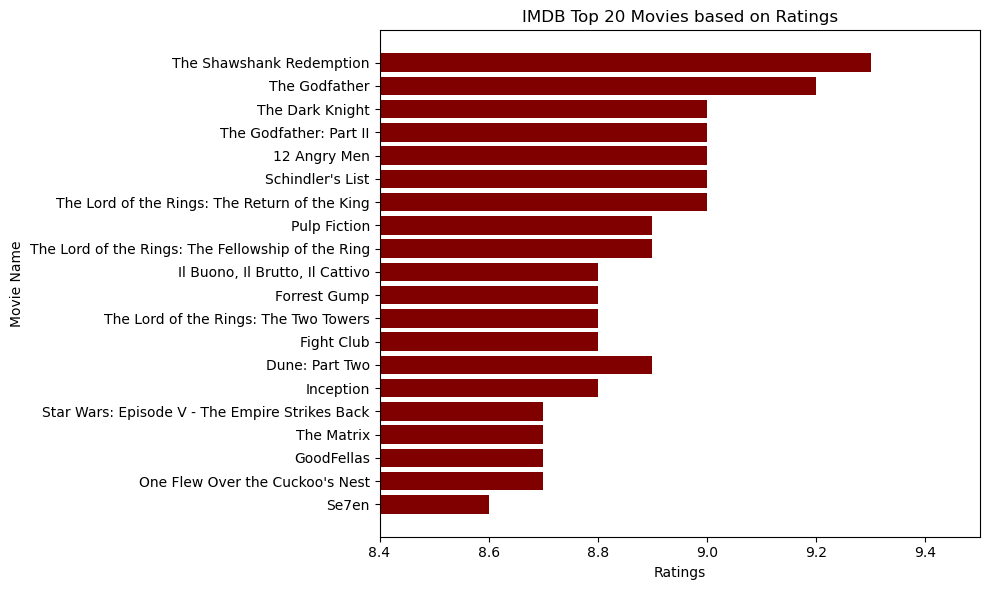

In [187]:
## Using matplotlib to visualize the ratings.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plot = plt.barh(df2['Movie_Name'],df2['Ratings'], color="Maroon")

plt.xlim(8.4, 9.5) 
plt.gca().invert_yaxis()

plt.xlabel('Ratings')
plt.ylabel('Movie Name')
plt.title('IMDB Top 20 Movies based on Ratings')


plt.tight_layout()